${\quad \quad \Large\textbf{1. Ganancias de cada etapa}}$

$$SNR = \frac{h^2 \mathbb{E}[X^2_{1}]}{\sigma^2} = \frac{h^2 \mathbb{E}[X^2_{i+1}]}{\sigma^2} = \frac{h^2}{\sigma^2} \mathbb{E}\big[[G_{i+1}(h X_i + W_i)]\big]^2 = \frac{h^2}{\sigma^2} \big[\mathbb{E}[(hX_i)^2]+ \mathbb{E}[2(h \overbrace{Xi Wi}^{\text{Xi e Wi ind.}})] + \mathbb{E}[W^2_i]\big] = \frac{h^2}{\sigma^2} \big[h^2\mathbb{E}[X_i^2]+ \overbrace{2h\mathbb{E}[(Xi)]\underbrace{\mathbb{E}[(Wi)]}_{\text{ $= 0$}}}^{\text{ = 0}} + \mathbb{E}[W^2_i]\big] =  \frac{h^2}{\sigma^2} G^2_{i+1} \mathbb{E}\big[h^2 \xi + \sigma^2 \big] = G^2_{i+1} \frac{1}{\sigma^2} [h^4\xi +\sigma^2] $$

$$SNR = \frac{h^2 \xi}{\sigma^2}$$

$$G_{i+1} = \sqrt{\frac{\xi}{h^2 \xi + \sigma^2}} \quad \quad ó \quad \quad  G_{i+1} = \sqrt{\frac{\xi}{h^2\xi + \sigma^2}} = \sqrt{\frac{\frac{\xi}{\sigma^2}}{\underbrace{\frac{h^2\xi}{\sigma^2}}_{\text{$SNR$}} + 1} } = \sqrt{\frac{1}{h^2}\frac{\overbrace{\frac{h^2\xi}{\sigma^2}}^{\text{$SNR$}}}{SNR + 1}} = \frac{1}{h}\sqrt{\frac{SNR}{SNR + 1}} $$

${\quad \quad \Large\textbf{2.1) Salidas } Y_{n}\textbf{ en función de } W \textbf{, } X_1 \textbf{ y } G}$

Comenzando por la definición de $Y_{i} = h X_i + W_i$, con $X_i = G_i Y_{i-1}$, se desarrolla en forma genérica para un cierto $Y_n$, de forma que para $Y_5$ resulte:

$$ Y_5 = h \left(  G_5(h (G_4(h (G_3(h G_2(h X_1 + W_1) + W_2) + W_3) + W_4) + W_5 \right) $$

Que reescrito en una forma mas útil es:

$$ Y_5 = X_1 h^5 G_2 G_3 G_4 G_5 + \left[  W_1 (G_2 G_3 G_4 G_5) h^4 + W_2 (G_3 G_4 G_5) h^3 + W_3 (G_4 G_5) h^2 + W_4 (G_5) h + W_5 \right]  $$

De una forma genérica se puede expresar:

$$ Y_{i} = X_{1} h^{i} \prod_{k=2}^{i} G_{k} + \underbrace{\sum_{j=1}^{i} \left[ h^{(i-j)} W_{j+1}  \prod_{k=j+1}^{i} G_{k} \right]}_{\phi_{i}} $$

Las distribucion de los terminos asociados al ruido ($\phi_{i}$) es una normal, con media y varianza tal que:

$$  \phi_{i} \sim \mathcal{N}\left( 0,~ \sum_{j=1}^{i} \left[ \sigma^2 h^{2(i-j)} \prod_{k=j+1}^{i} G_{k}^{2} \right] \right) $$

${\quad \quad \Large\textbf{2.2) Relacion señal ruido de la ultima etapa } \rho_{n}} $

Considerando que en la ultima etapa la señal es:

$$ Y_{n} = \underbrace{X_{1} h^{n} \prod_{k=2}^{n} G_{k}}_{\chi_{n}} + \underbrace{\sum_{j=1}^{n} \left[ h^{(n-j)} W_{j+1}  \prod_{k=j+1}^{n} G_{k} \right]}_{\phi_{n}} $$

Se aisla la parte de señal útil y la parte de ruido, dividiendose la auto-correlación de cada una para obtener la SNR$_{n}$

$$ \text{SNR}_{n} = \frac{\mathbb{E}[\chi_{n}^{2}]}{\mathbb{E}[\phi_{n}^{2}]} = \frac{\xi h^{2n} \prod_{k=2}^{n} G_{k}^{2}}{\sum_{j=1}^{n} \left[ \sigma^2 h^{2(n-j)} \prod_{k=j+1}^{n} G_{k}^{2} \right]} = \overbrace{\frac{\xi h^2}{\sigma^2}}^{\text{SNR}_1} \frac{ h^{2n-2} \prod_{k=2}^{n} G_{k}^{2}}{\sum_{j=1}^{n} \left[ h^{2(n-j)} \prod_{k=j+1}^{n} G_{k}^{2} \right]} $$

$$ \frac{\xi h^2}{\sigma^2} \frac{h^{2n-2} G_{2}^{2} G_{3}^{2} \cdots G_{n}^{2}}{h^{2(n-1)} G_{2}^{2} G_{3}^{2} \cdots G_{n}^{2} + h^{2(n-2)} G_{3}^{2} G_{4}^{2} \cdots G_{n}^{2} + \cdots} = \frac{\xi h^2}{\sigma^2} \frac{h^{2(n-1)}}{h^{2(n-1)} \frac{G_{2}^{2} G_{3}^{2} \cdots G_{n}^{2}}{G_{2}^{2} G_{3}^{2} \cdots G_{n}^{2}} + h^{2(n-2)} \frac{G_{3}^{2} G_{4}^{2} \cdots G_{n}^{2}}{G_{2}^{2} G_{3}^{2} \cdots G_{n}^{2}} + \cdots} = \frac{\xi h^2}{\sigma^2} \frac{h^{2(n-1)}}{h^{2(n-1)} + \frac{h^{2(n-2)}}{G_{2}^{2}} + \frac{h^{2(n-3)}}{G_{2}^{2} G_{3}^{2}} + \cdots}$$

$$ = \frac{\xi h^2}{\sigma^2} \frac{1}{\frac{h^{2(n-1)}}{h^{2(n-1)}} +  \frac{h^{2(n-2)}}{h^{2(n-1)}}G_{2}^{-2} + \frac{h^{2(n-3)}}{h^{2(n-1)}}G_{2}^{-2} G_{3}^{-2} + \cdots} = \frac{\xi h^2}{\sigma^2} \frac{1}{1 +  h^{-2(1)}G_{2}^{-2} + h^{-2(2)}G_{2}^{-2} G_{3}^{-2} + \cdots}  = $$


$$ \text{SNR}_{n} = \frac{\text{SNR}_{1}}{\sum_{j=1}^{n} \left[ h^{-2(j-1)} \prod_{k=2}^{j} G_{k}^{-2} \right]} $$

Usando el resultado $\text{G}_{k} = \frac{1}{h}\sqrt{\frac{SNR_1}{SNR_1 + 1}}$:

$$ \text{SNR}_{n} = \frac{\text{SNR}_{1}}{\sum_{j=1}^{n} \left[ h^{-2(j-1)} \prod_{k=2}^{j} h^{2}\frac{SNR_1 + 1}{SNR_1} \right]} = \frac{\text{SNR}_{1}}{\sum_{j=1}^{n} \left[ h^{-2(j-1)} \left( h^{2}\frac{SNR_1 + 1}{SNR_1} \right)^{j-1} \right]} = \frac{\text{SNR}_{1}}{\sum_{j=1}^{n} \left[ h^{-2(j-1)} h^{2(j-1)} \left( \frac{SNR_1 + 1}{SNR_1} \right)^{j-1} \right]} $$

Luego, con $k = j - 1$

$$ \text{SNR}_{n} = \frac{\text{SNR}_{1}}{\sum_{k=0}^{n-1} \left( \frac{SNR_1 + 1}{SNR_1} \right)^{k}} $$

Que mediante la identidad, $\sum_{k=0}^{n-1} \alpha^{k} = \frac{\alpha^{n}-1}{\alpha - 1}$, se obtiene:

$$ \text{SNR}_{n} = \frac{\text{SNR}_{1}}{\frac{\left( \frac{SNR_1 + 1}{SNR_1} \right)^{n}-1}{\frac{SNR_1 + 1}{SNR_1} - 1}} = \frac{\text{SNR}_{1}(\frac{SNR_1 + 1}{SNR_1} - 1)}{\left( \frac{SNR_1 + 1}{SNR_1} \right)^{n}-1} = \frac{\overbrace{\text{SNR}_{1}(\frac{SNR_1 + 1 - SNR_1}{SNR_1})}^{= 1}}{\underbrace{\frac{\left(SNR_1 + 1\right)^{n}}{SNR_{1}^{n}}-1}_{\frac{\left(SNR_1 + 1\right)^{n}}{SNR_{1}^{n}}-\frac{SNR_{1}^{n}}{SNR_{1}^{n}}}} = \frac{1}{\frac{\left(SNR_1 + 1\right)^{n} - SNR_{1}^{n}}{SNR_{1}^{n}}}=\frac{SNR_{1}^{n}}{(SNR_{1}+1)^{n} - SNR_{1}^{n}}$$

Finalmente:

$$ \text{SNR}_{n} = \frac{1}{(1+SNR_{1}^{-1})^{n}-1} $$

20


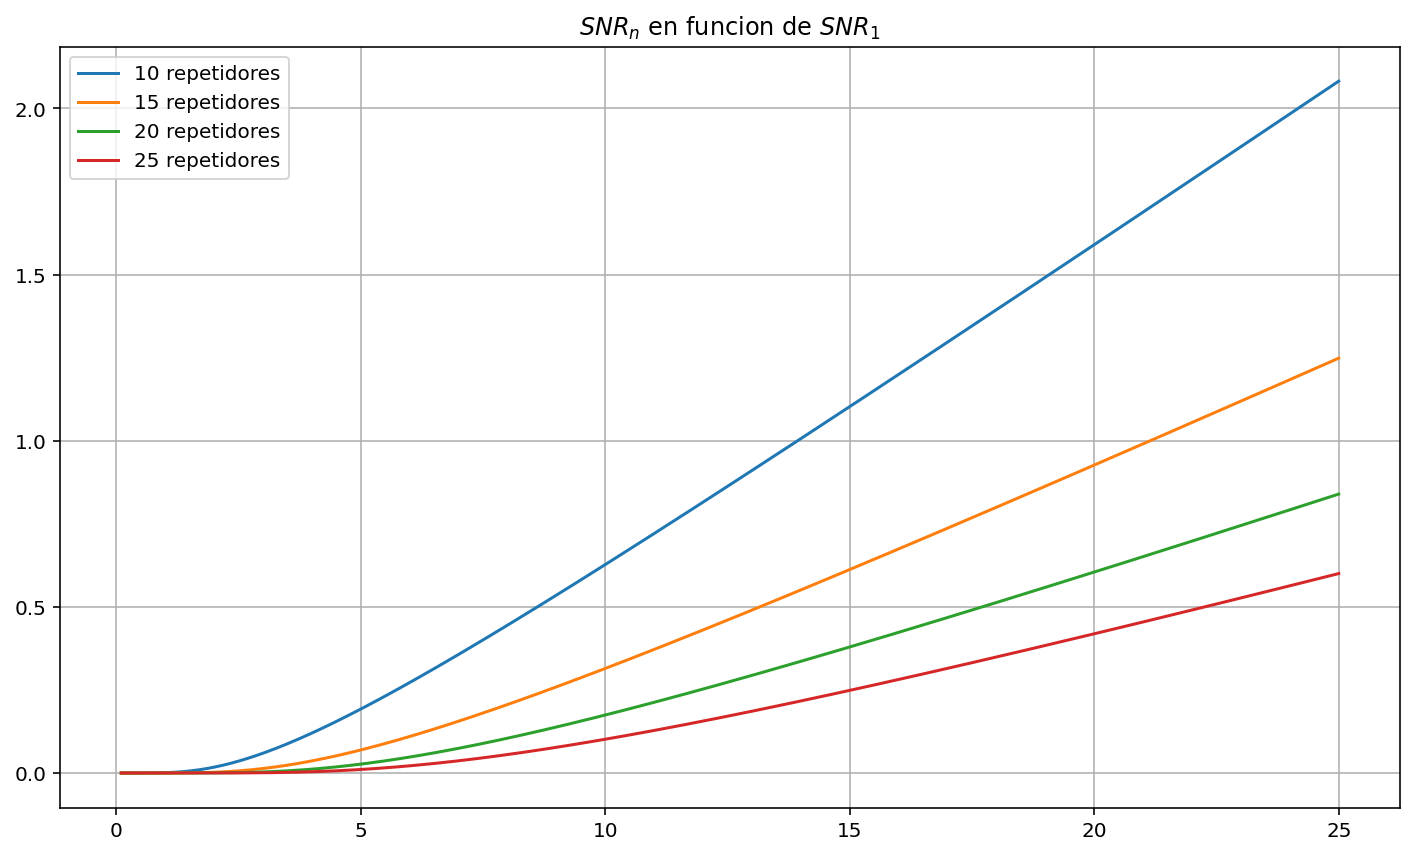

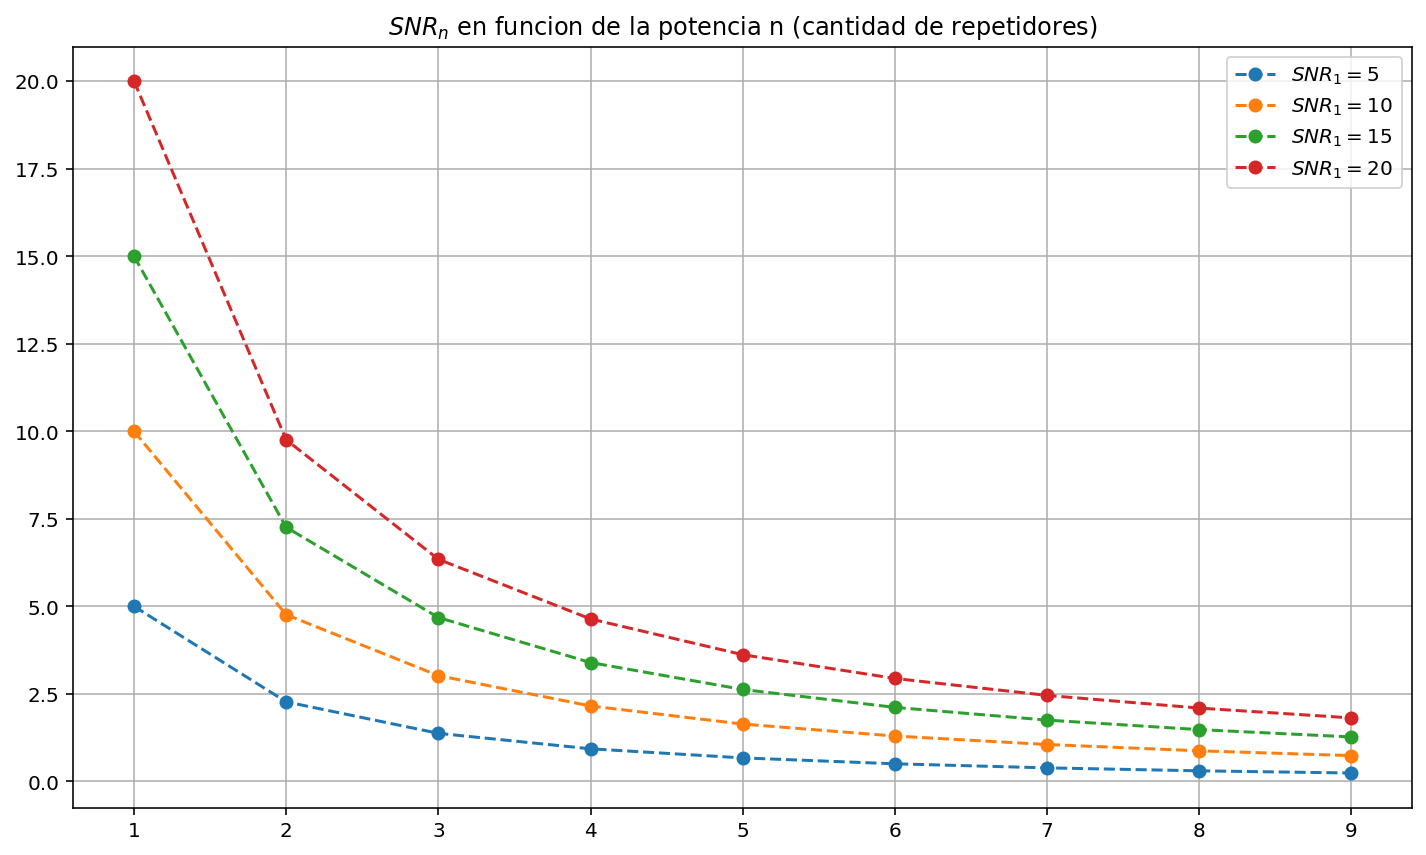

In [2]:
import matplotlib.pyplot as plt
import numpy as np

step_SNR = 1/1000
cant_repe = 10

n_const = [10, 15, 20, 25]   # cantidad fija de repetidores
SNR_const = [5, 10, 15, 20]  # cantidad fija de SNR_1

SNR_1 = np.arange(0.1,25,step_SNR)
n = np.arange(1,cant_repe,1)

SNR_n_SNR_1 = 1/((1+(1/SNR_1))**(n_const[1])-1)  # particularmente para las constantes 1
SNR_n_n = 1/((1+(1/SNR_const[1]))**(n)-1)

print(n_const[2])

vector_legend = []

plt.figure()
for i in n_const:
    plt.plot(SNR_1, 1/((1+(1/SNR_1))**(i)-1))
    vector_legend.append('%d repetidores'%i)

plt.legend(vector_legend)
plt.title(r'$SNR_{n}$ en funcion de $SNR_{1}$')
plt.grid('minor')

vector_legend = []

plt.figure()
for i in SNR_const:
    plt.plot(n, 1/((1+(1/i))**(n)-1), 'o--')
    vector_legend.append(r'$SNR_1 = %d$ '%i)

plt.legend(vector_legend)

plt.title(r'$SNR_{n}$ en funcion de la potencia n (cantidad de repetidores)')
plt.grid('minor')

${\quad \quad \Large\textbf{2.3) Probabilidad de error promedio en función de SNR de la última etapa } \rho_{n}} $


La probabildad de error se puede calcular de la siguiente manera usando probabilidades totales y teniendo en cuenta que el receptor determina el valor de $\hat{X}_1$ como:


$$
\hat{X}_{1} = \left\{\begin{array}{ll}
         A & \textrm{si } Y_{n} \geq 0\\
        -A & \textrm{si } Y_{n} < 0
      \end{array}\right.
$$

Por lo tanto calculamos la probabilidad de error utilizando la formula de probabilidades totales como:

$$
\begin{aligned}
\mathbb{P}_{e} &= \mathbb{P}\left[\hat{X}_{1} \neq X_{1}\right]\\ 
&= \mathbb{P}\left[\hat{X}_{1} \neq X{1} |{X_{1} = A}\right]\mathbb{P}\left[X_{1} = A\right] + \mathbb{P}\left[\hat{X}_{1} \neq X_{1} |{X_{1} = -A}\right] \mathbb{P}\left[X_{1} = -A\right]\\
&= \mathbb{P}\left[\hat{X}_{1} = -A |{X_{1} = A}\right] \mathbb{P}\left[X_{1} = A\right] + \mathbb{P}\left[\hat{X}_{1} = A |{X_{1} = -A}\right] \mathbb{P}\left[X_{1} = -A\right]\\
&= \mathbb{P}\left[Y_{n} < 0 |{X_{1} = A}\right] \mathbb{P}\left[X_{1} = A\right] + \mathbb{P}\left[Y_{n} \geq 0 |{X_{1} = -A}\right] \mathbb{P}\left[X_{1} = -A\right]
\end{aligned}
$$

Anteriormente se obtuvo que:

$$ Y_{n} = \underbrace{X_{1} h^{n} \prod_{k=2}^{n} G_{k}}_{\chi_{n}} + \underbrace{\sum_{j=1}^{n} \left[ h^{(n-j)} W_{j+1}  \prod_{k=j+1}^{n} G_{k} \right]}_{\phi_{n}} $$

$$  \phi_{n} \sim \mathcal{N}\left( 0,~ \sum_{j=1}^{n} \left[ \sigma^2 h^{2(n-j)} \prod_{k=j+1}^{n} G_{k}^{2} \right] \right), \quad\quad \text{si }G_k = \frac{1}{h}\sqrt{\frac{SNR}{SNR + 1}} $$


$$\phi_{n} \sim \mathcal{N}(0,\overbrace{ \sigma^2 [1+SNR_1] \Bigg[1-\bigg[\frac{SNR_1}{1+SNR_1}\bigg]^n\Bigg]}^{\text{ver Apéndice 1}}) $$



Entonces $${Y_{n}|}_{X_1 = \pm A} \sim \mathcal{N}(\pm A h^{n} \prod_{k=2}^{n} G_{k},\sigma^2 [1+SNR_1] \Bigg[1-\bigg[\frac{SNR_1}{1+SNR_1}\bigg]^n\Bigg])$$

Además se obtuvo que:


$$
h^{n} \prod_{k=2}^{n} G_{k} = h \bigg[\frac{SNR_1}{1+SNR_1}\bigg]^{\frac{n-1}{2}} \text{ver Apéndice 1}
$$

Luego $${Y_{n}|}_{X_1 = \pm A} \sim \mathcal{N}(\pm A h \bigg[\frac{SNR_1}{1+SNR_1}\bigg]^{\frac{n-1}{2}},\sigma^2 [1+SNR_1] \Bigg[1-\bigg[\frac{SNR_1}{1+SNR_1}\bigg]^n\Bigg])$$

Finalmente $$SNR_1 = \frac{1}{\big[1+\frac{1}{SNR_n}\big]^{\frac{1}{n}}-1}$$
 $${Y_{n}|}_{X_1 = \pm A} \sim \mathcal{N}(\pm A h \bigg[\frac{1}{\bigg(1+\frac{1}{SNR_n}\bigg)^{\frac{1}{n}}}\bigg]^{\frac{n-1}{2}},\sigma^2 \Bigg[\frac{\big(1+\frac{1}{SNR_n}\big)^{\frac{1}{n}}}{\big(1+\frac{1}{SNR_n}\big)^{\frac{1}{n}}-1}\Bigg] \Bigg[1-\frac{1}{1+\frac{1}{SNR_n}}\Bigg])$$

Transformamos la función de supervivencia a la función de distribución.
$$
\mathbb{P}\left[Y_{n} \geq 0 |_{X_{1} = -A}\right]\ = 1-\mathbb{P}\left[Y_{n} < 0 |_{X_{1} = -A}\right]
$$

Normalizamos la función de distribución sabiendo que $\mathbb{P}\left[X_{1} = A\right] = \mathbb{P}\left[X_{1} = -A\right] = \frac{1}{2}$
$$
   \mathbb{P}_{e} = \frac{1}{2}\,\Phi\left(-\frac{\mu_{{Y_{n}|}_{X_1 = A}}}{\sigma_{{{Y_{n}|}_{X_1 = A}}}}\right) + \frac{1}{2}\left(1-\Phi\left(-\frac{\mu_{{Y_{n}|}_{X_1 = -A}}}{\sigma_{{Y_{n}|}_{X_1 = -A}}}\right)\right)
$$

Ademas podemos decir que en el segundo termino $-\mu_{{Y_{n}|}_{X_1 = -A}}=\mu_{{Y_{n}|}_{X_1 = A}} \text{ y } \sigma_{{Y_{n}|}_{X_1 = -A}}=\sigma_{{Y_{n}|}_{X_1 = A}}$ ya que no depende de que si $X_{1}=A \text{ o } X_{1}=-A$ y que el primer término por simetría de la función de distribución de la normal estandar.

$$
    \mathbb{P}_{e} = \frac{1}{2}\,\left(1-\Phi\left(\frac{\mu_{{Y_{n}|}_{X_1 = A}}}{\sigma_{{{Y_{n}|}_{X_1 = A}}}}\right)\right) + \frac{1}{2}\left(1-\Phi\left(\frac{\mu_{{Y_{n}|}_{X_1 = A}}}{\sigma_{{Y_{n}|}_{X_1 = -A}}}\right)\right)
    =1-\Phi\left(\frac{\mu_{{Y_{n}|}_{X_1 = -A}}}{\sigma_{{{Y_{n}|}_{X_1 = -A}}}}\right)
$$

$$\text{Sabiendo que}\quad \mu_{{Y_{n}|}_{X_1 = -A}} = A h^{n} \prod_{k=2}^{n} G_{k},\quad\quad\quad \text{y que}, \quad \text{SNR}_n = \frac{\mathbb{E}[\chi_{n}^{2}]}{\mathbb{E}[\Phi_{n}^{2}]} = \frac{\xi h^{2n} \prod_{k=2}^{n} G_{k}^{2}}{\sigma^{2}_{{Y_{n}|}_{X_1 = A}}} \implies \sigma_{{Y_{n}|}_{X_1 = A}} = \frac{\sqrt{\xi} h^{n} \prod_{k=2}^{n} G_{k}}{\sqrt{\text{SNR}_n}}$$

Entonces la probabilidad de error es:

$$ \mathbb{P}_{e} = 1-\Phi\left(\frac{\mu_{{Y_{n}|}_{X_1 = -A}}}{\sigma_{{{Y_{n}|}_{X_1 = -A}}}}\right) = 1 - \Phi\left( \frac{A h^{n} \prod_{k=2}^{n} G_{k}}{\frac{\sqrt{\xi} h^{n} \prod_{k=2}^{n} G_{k}}{\sqrt{\text{SNR}_n}}}\right) \overbrace{=}^{A = \sqrt{\xi}} 1-\Phi\left(\sqrt{\text{SNR}_n}\right)$$

<Figure size 864x504 with 0 Axes>

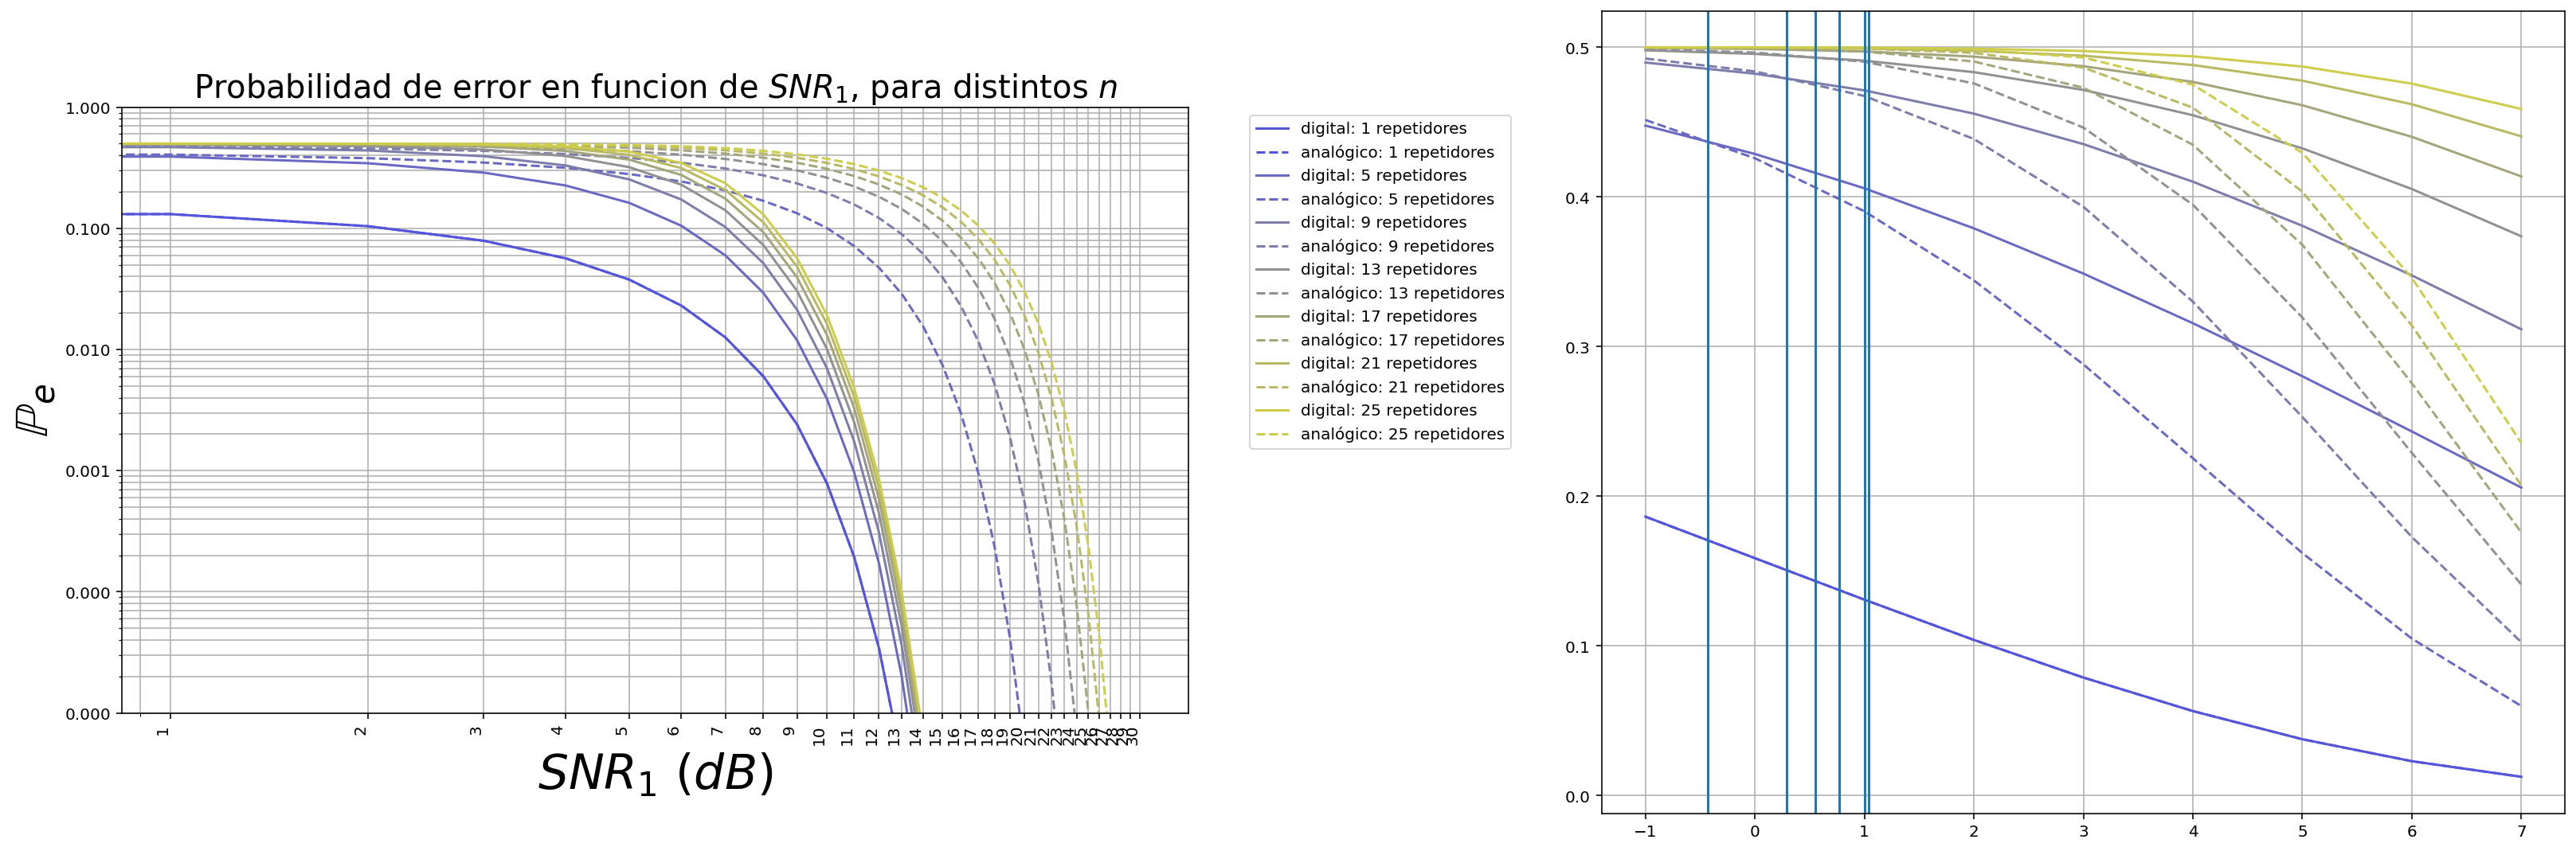

In [10]:
import scipy as sc
from scipy import stats
from matplotlib import scale


qfunc = lambda x : sc.stats.norm.sf(x) # defino la función qfunc

P_e_d = lambda n, SNR_lin: 1/2 * (1-(1-2*qfunc(np.sqrt(SNR_lin)))**n) # Probabilidad de error (digital)
P_e = lambda n,SNR_lin: qfunc(np.sqrt(1 / ( (1+(1/SNR_lin))**n - 1))) # Probabilidad de error (analogico)
Resta = lambda n, SNR_lin:1/2 * (1-(1-2*qfunc(np.sqrt(SNR_lin)))**n) - qfunc(np.sqrt(1 / ( (1+(1/SNR_lin))**n - 1)))
SNR = np.arange(-5,30 + 1)
SNR_lin = 10 ** (SNR/10)

vector_legend = []

fig1 = plt.figure()
fig1, ax1 = plt.subplots()
#ax=fig1
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))

for n in range(1,25+4,4):
    plt.plot(SNR,P_e_d(n,SNR_lin), color=((80+5*n)/255,(80+5*n)/255,(225-6*n)/255))
    vector_legend.append('digital: %d repetidores'%n)
    plt.plot(SNR,P_e(n,SNR_lin), color=((80+5*n)/255,(80+5*n)/255,(225-6*n)/255), linestyle='--')
    vector_legend.append('analógico: %d repetidores'%n)

#color viejo
#(5*n+100)/255,0/255,0/255
plt.xscale('log')
plt.yscale('log')
plt.ylim(10e-6,1)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=30)
plt.grid(True, which="both", ls="-")
plt.title(r'Probabilidad de error en funcion de $SNR_1$, para distintos $n$')
plt.xlabel(r'$SNR_1~(dB)$')
plt.ylabel(r'$\mathbb{P}_{e}$')
plt.legend(vector_legend, bbox_to_anchor=(1.05, 1.0), loc='upper left')
#ax1.set_xticks(10*np.log10(SNR))
#plt.xticks(rotation=60)
ax1.set_xticks(np.linspace(1, 30, 30))
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.setp(ax1.get_xticklabels(), rotation=90, horizontalalignment='right')

left, bottom, width, height = [1.2, 0, 0.7, 1]
ax2 = fig1.add_axes([left, bottom, width, height])

for n in range(1,25+4,4):
    ax2.plot(SNR[4:13],P_e_d(n,SNR_lin[4:13]), color=((80+5*n)/255,(80+5*n)/255,(225-6*n)/255), linestyle= '--')
    ax2.plot(SNR[4:13],P_e(n,SNR_lin[4:13]), color=((80+5*n)/255,(80+5*n)/255,(225-6*n)/255))

x_intersection=[-0.43,0.29,0.55,0.77,1,1.04]
for xc in x_intersection:
    ax2.axvline(x=xc)
ax2.grid('minor')
#plt.tight_layout()
plt.show()




